# Notebook Imports

In [18]:
from numpy import exp
from numpy.random import randn
from feature_engine import transformation as vt
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

## Generate sample Data

In [19]:
data = randn(999)
data[:5]

array([-0.34488588,  0.83633658,  0.4033301 , -2.12609852, -0.41149943])

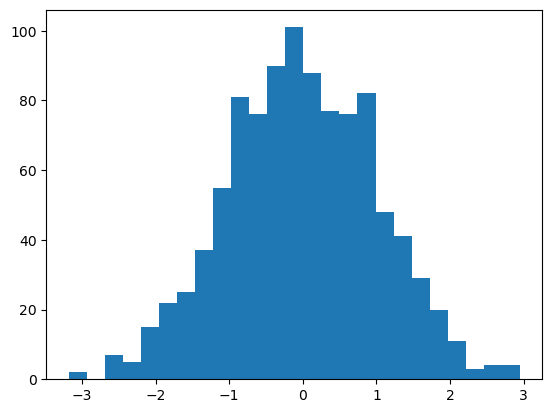

In [20]:
plt.hist(data, bins=25)
plt.show()

In [21]:
data_skew = exp(data)
data_skew[:5]

array([0.70830118, 2.30789668, 1.4968009 , 0.11930184, 0.6626559 ])

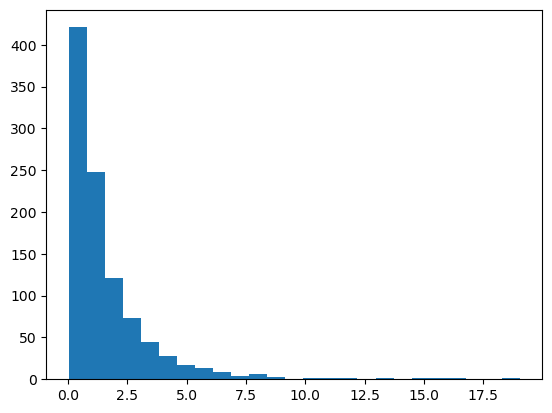

In [22]:
plt.hist(data_skew, bins=25)
plt.show()

In [23]:
data_skew.shape

(999,)

In [24]:
# convert the data into a dataframe
data_skew = data_skew.reshape((len(data), 1))
df_skew = pd.DataFrame(data_skew, columns=['Value'])
df_skew.head()

,Value
0,0.708301
1,2.307897
2,1.496801
3,0.119302
4,0.662656


# Log Transformer

In [28]:
# generate and fit log transformer
lgt = vt.LogTransformer(variables= ['Value'])
lgt.fit(df_skew)

# apply log transformation 
data_lg = lgt.transform(df_skew)
data_lg.head()

,Value
0,-0.344886
1,0.836337
2,0.403330
3,-2.126099
4,-0.411499


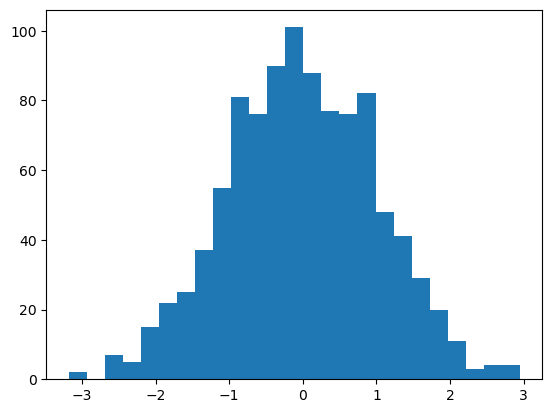

In [29]:
plt.hist(data_lg['Value'], bins=25)
plt.show()

# Quantile Transformer

In [33]:
qt = QuantileTransformer(output_distribution='normal')
qt.fit(df_skew[['Value']])

# apply quantile transformation
data_q = qt.transform(df_skew[['Value']])
data_q[:5]

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (999). n_quantiles is set to n_samples.
  warnings.warn(


array([[-0.33254342],
       [ 0.80149404],
       [ 0.41333838],
       [-2.09611327],
       [-0.38613215]])

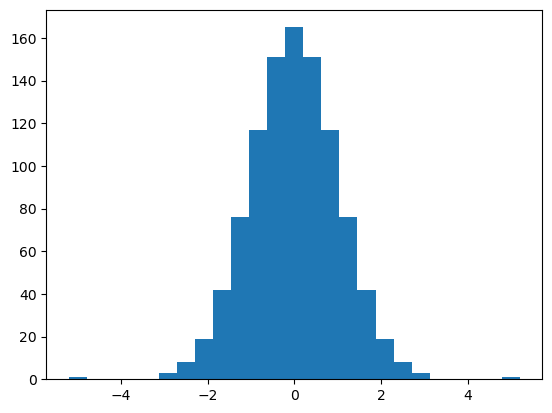

In [34]:
plt.hist(data_q, bins=25)
plt.show()